# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.gridspec as gridspec
import numpy as np
import random

# Import Data

In [4]:
edge = pd.read_csv('site.csv')
user = pd.read_csv('users-aus.csv')
full_data = pd.read_csv('Full_data.csv')

In [5]:
for i in range(6):
    user = pd.concat((user,user),axis=0,ignore_index=True)

In [6]:
a = full_data[['start time','end time']][::20]
b = full_data['month'][::20]
c = full_data['date'][::20]

In [7]:
b = b.to_frame()
c = c.to_frame()

In [8]:
user['start time'] = a[:len(user)]['start time'].to_frame().reset_index(drop=True)
user['end time'] = a[:len(user)]['end time'].to_frame().reset_index(drop=True)
user['month']  = b[:len(user)]['month'].to_frame().reset_index(drop=True)
user['date']  = c[:len(user)]['date'].to_frame().reset_index(drop=True)

In [9]:
new_column_values = np.random.randint(10, 100, size=len(user))
user['Size'] = new_column_values

In [10]:
user['start time'] = pd.to_datetime(user['start time'])
user['end time'] = pd.to_datetime(user['end time'])

user['start_hour'] = user['start time'].dt.hour
user['end_hour'] = user['end time'].dt.hour

#### Filter Data

In [11]:
def filter_data_hour(data,start_time,end_time):
    return data[((data['start_hour'] >= start_time) & ((data['start_hour'] < end_time)) & ((data['end_hour'] >= start_time) & (data['end_hour'] < end_time)))].drop(columns=['start_hour','end_hour'])

In [12]:
filtered_data_0_1= filter_data_hour(user,start_time=0,end_time=1)
filtered_data_1_2= filter_data_hour(user,start_time=1,end_time=2)
filtered_data_2_3= filter_data_hour(user,start_time=2,end_time=3)
filtered_data_3_4= filter_data_hour(user,start_time=3,end_time=4)
filtered_data_4_5= filter_data_hour(user,start_time=4,end_time=5)
filtered_data_5_6= filter_data_hour(user,start_time=5,end_time=6)
filtered_data_6_7= filter_data_hour(user,start_time=6,end_time=7)
filtered_data_7_8= filter_data_hour(user,start_time=7,end_time=8)
filtered_data_8_9= filter_data_hour(user,start_time=8,end_time=9)
filtered_data_9_10 = filter_data_hour(user,start_time=9,end_time=10)
filtered_data_10_11 = filter_data_hour(user,start_time=10,end_time=11)
filtered_data_11_12 = filter_data_hour(user,start_time=11,end_time=12) 
filtered_data_12_13 = filter_data_hour(user,start_time=12,end_time=13)
filtered_data_13_14 = filter_data_hour(user,start_time=13,end_time=14)
filtered_data_14_15 = filter_data_hour(user,start_time=14,end_time=15)
filtered_data_15_16 = filter_data_hour(user,start_time=15,end_time=16)
filtered_data_16_17 = filter_data_hour(user,start_time=16,end_time=17)
filtered_data_17_18 = filter_data_hour(user,start_time=17,end_time=18)
filtered_data_18_19 = filter_data_hour(user,start_time=18,end_time=19)
filtered_data_19_20 = filter_data_hour(user,start_time=19,end_time=20)
filtered_data_20_21 = filter_data_hour(user,start_time=20,end_time=21)
filtered_data_21_22 = filter_data_hour(user,start_time=21,end_time=22)
filtered_data_22_23 = filter_data_hour(user,start_time=22,end_time=23)
filtered_data_23_24 = filter_data_hour(user,start_time=23,end_time=24)

In [13]:
user.to_csv('User_Full_New.csv')

#### Show

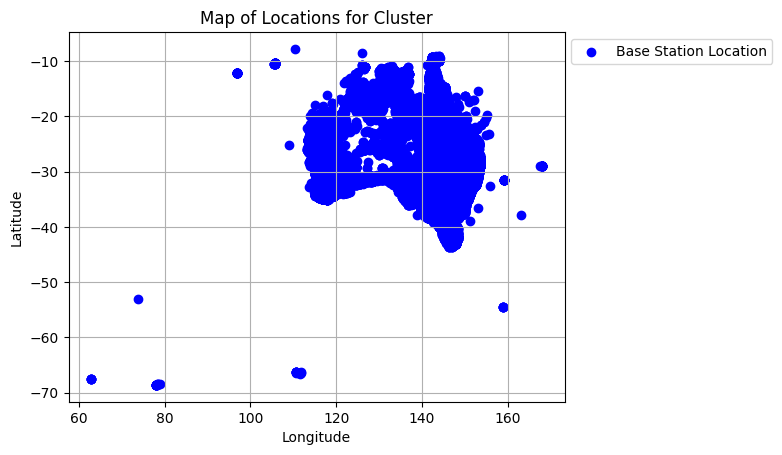

In [14]:
lons = edge['LONGITUDE']
lats = edge['LATITUDE']

plt.scatter(lons, lats, color='blue', marker='o',label='Base Station Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Map of Locations for Cluster')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# K-Means

## With Base Station Location

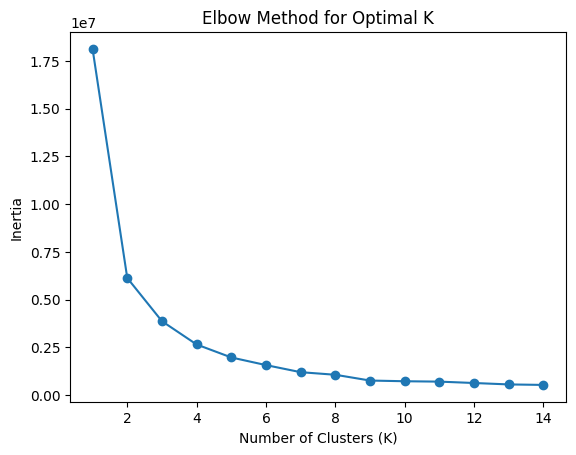

In [15]:
# df = data[(pd.notna(data['longitude'])) & (pd.notna(data['latitude']))]
features = edge[['LATITUDE', 'LONGITUDE']]
features = pd.get_dummies(features, drop_first= True)

inertia = []
possible_k_values = range(1, 15)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(possible_k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [16]:
kn = KneeLocator(range(1,15), inertia, curve='convex', direction='decreasing', S=0.001, online = True)
print('Optimal number of clusters:', kn.elbow)

Optimal number of clusters: 3


In [17]:
optimal_k = kn.elbow
kmeans = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features)

edge = edge.copy()
edge['Cluster'] = clusters
edge

,SITE_ID,LATITUDE,LONGITUDE,NAME,STATE,LICENSING_AREA_ID,POSTCODE,SITE_PRECISION,ELEVATION,HCIS_L2,Cluster
0,1000,-12.471947,130.845073,Fort Hill Wharf DARWIN,NT,4,800.0,Unknown,NaN,GO7H,0
1,10000,-33.756158,150.698182,Cnr Castlereagh & Lethbri PENRITH,NSW,2,2750.0,Unknown,NaN,MV9O,1
2,10000002,-28.777660,114.634260,Optus 50m Lattice Tower 71 Eastward Road Utakarra,WA,4,NaN,Within 10 meters,NaN,AU3O,0
3,10000003,-12.464597,130.840708,6 Knuckey Street Darwin,NT,4,NaN,Within 10 meters,NaN,GO7H,0
4,10000004,-39.596400,143.933900,Cape Wickham Links Clubhouse KING ISLAND,TAS,5,NaN,Within 100 meters,NaN,KX8L,1
...,...,...,...,...,...,...,...,...,...,...,...
95557,9989,-33.752425,150.696231,114-116 Henry St Rds PENRITH,NSW,2,2750.0,Within 10 meters,NaN,MV9O,1
95558,9993,-33.730815,150.697780,5 Andrews Rd PENRITH,NSW,2,2750.0,Unknown,NaN,MV9K,1
95559,9995,-33.752834,150.698811,CMTS Site 90-92 Henry St PENRITH,NSW,2,2750.0,Within 10 meters,39.0,MV9O,1
95560,9997,-33.750361,150.696718,Railway Station Belmore St PENRITH,NSW,2,2750.0,Unknown,35.0,MV9O,1


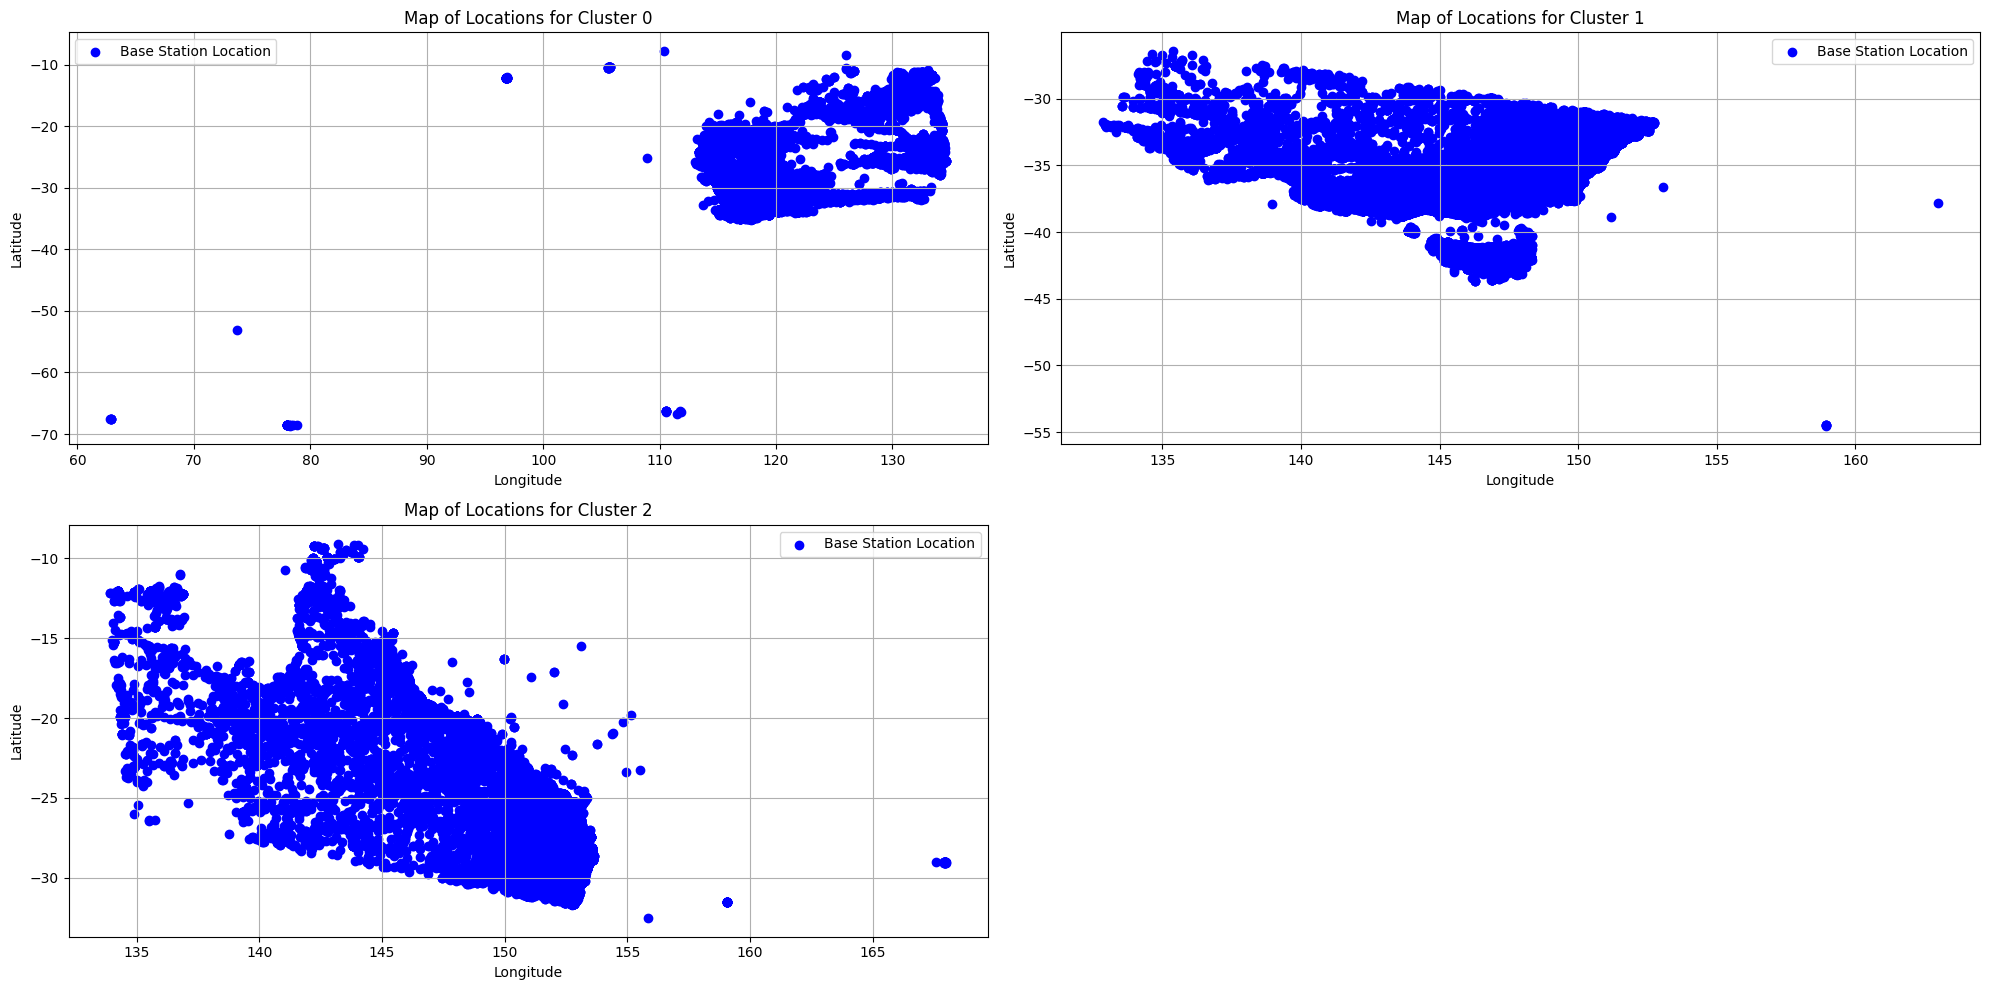

In [18]:
# Tạo một lưới 2x2 và vẽ từng biểu đồ vào từng ô
plt.figure(figsize=(20, 10))  # Kích thước của hình toàn cảnh

for i in range(3):
    lons = edge[edge['Cluster']==i]['LONGITUDE']
    lats = edge[edge['Cluster']==i]['LATITUDE']
    
    plt.subplot(2, 2, i+1)  # Tạo ô tại vị trí i+1 trong lưới 2x2
    plt.scatter(lons, lats, color='blue', marker='o',label='Base Station Location')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Map of Locations for Cluster {i}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Tự động điều chỉnh layout để tránh chồng chéo
plt.show()


In [19]:
edge['center_lon'] = 0
edge['center_lat'] = 0

In [20]:
for i in range(3):
    edge.loc[edge['Cluster'] == i, 'center_lat'] = edge[edge['Cluster']==i]['LATITUDE'].mean()
    edge.loc[edge['Cluster'] == i, 'center_lon'] = edge[edge['Cluster']==i]['LONGITUDE'].mean()

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_19796\4289462530.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-26.781299224223797' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  edge.loc[edge['Cluster'] == i, 'center_lat'] = edge[edge['Cluster']==i]['LATITUDE'].mean()
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_19796\4289462530.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '119.76442581344708' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  edge.loc[edge['Cluster'] == i, 'center_lon'] = edge[edge['Cluster']==i]['LONGITUDE'].mean()


##

## With User Location

### With K-Means

##### Def K-mean for no clusterd

In [21]:
def K_Means_No_Clustered(data):
    features = data[['Latitude', 'Longitude']]
    features = pd.get_dummies(features, drop_first= True)

    inertia = []
    possible_k_values = range(1, 15)

    for k in possible_k_values:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(features)
        inertia.append(kmeans.inertia_)
    kn = KneeLocator(range(1,15), inertia, curve='convex', direction='decreasing', S=0.001, online = True)
    print('Optimal number of clusters:', kn.elbow)
    optimal_k = kn.elbow
    kmeans = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(features)

    data_copy = data.copy()
    data_copy['Cluster'] = clusters
    data_copy
    plt.plot(possible_k_values, inertia, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.show()
    return data_copy

##### Def K-Means for clusterd

In [22]:
def K_Means_Clustered(data):
    features = data[['Latitude', 'Longitude']]
    features = pd.get_dummies(features, drop_first= True)

    inertia = []
    possible_k_values = range(1, 15)

    for k in possible_k_values:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(features)
        inertia.append(kmeans.inertia_)
    kn = KneeLocator(range(1,15), inertia, curve='convex', direction='decreasing', S=0.001, online = True)
    print('Optimal number of clusters:', kn.elbow)
    optimal_k = kn.elbow
    kmeans = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(features)

    data_copy = data.drop(columns=['Cluster']).copy()
    data_copy['Cluster'] = clusters
    return data_copy

Optimal number of clusters: 4


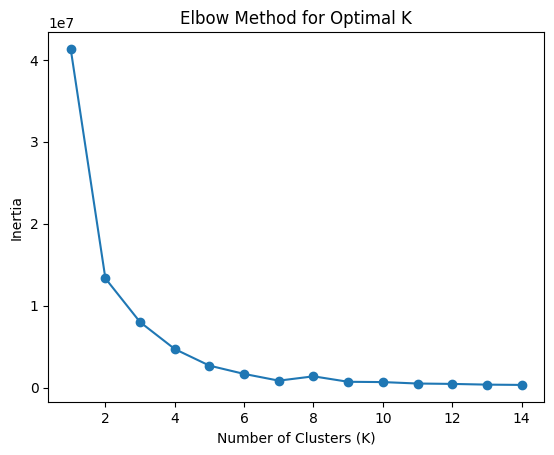

In [23]:
user_copy = K_Means_No_Clustered(user)

In [24]:
user_copy['center_lon'] = 0
user_copy['center_lat'] = 0

In [25]:
for i in range(4):
    user_copy.loc[user_copy['Cluster'] == i, 'center_lat'] = user_copy[user_copy['Cluster']==i]['Latitude'].mean()
    user_copy.loc[user_copy['Cluster'] == i, 'center_lon'] = user_copy[user_copy['Cluster']==i]['Longitude'].mean()

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_19796\2442948222.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-29.686450968992247' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  user_copy.loc[user_copy['Cluster'] == i, 'center_lat'] = user_copy[user_copy['Cluster']==i]['Latitude'].mean()
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_19796\2442948222.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '117.69153740310077' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  user_copy.loc[user_copy['Cluster'] == i, 'center_lon'] = user_copy[user_copy['Cluster']==i]['Longitude'].mean()


#### Show

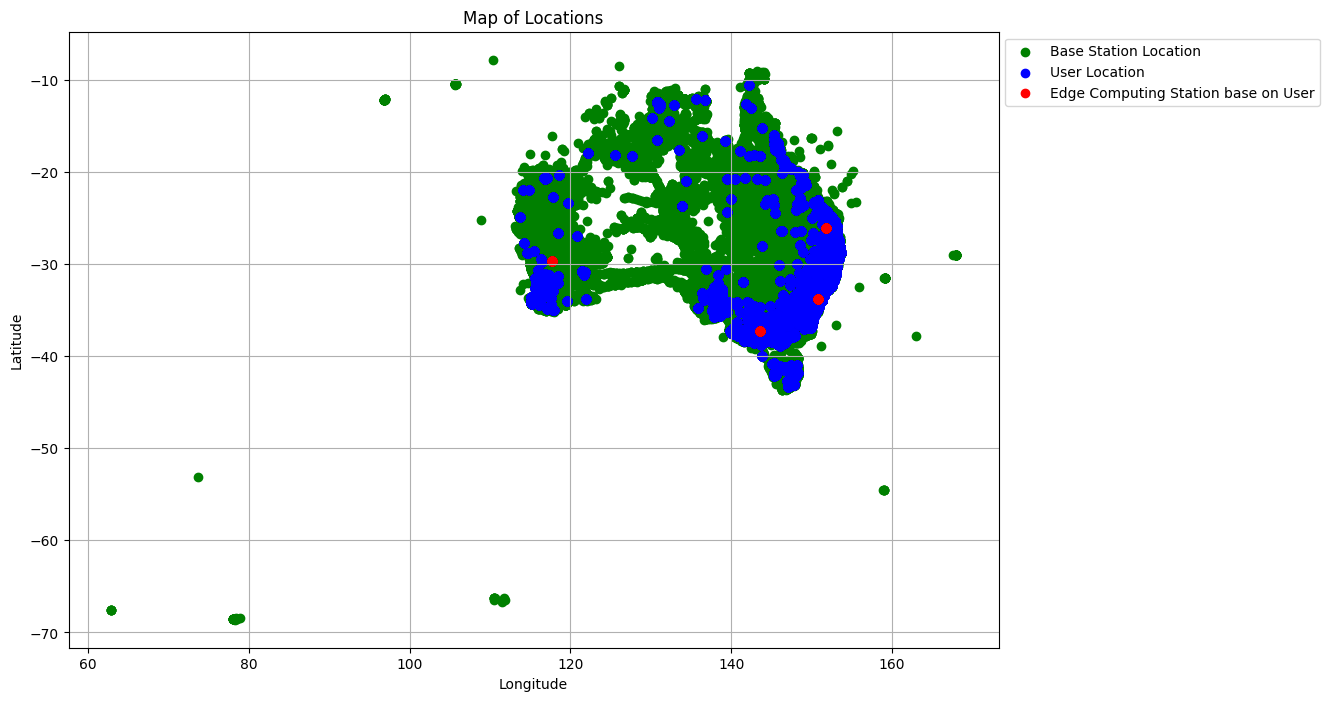

In [26]:
lons = user_copy['Longitude']
lats = user_copy['Latitude']

lats_edge = edge['LATITUDE']
lons_edge = edge['LONGITUDE']

center_lon = user_copy['center_lon']
center_lat = user_copy['center_lat']

plt.figure(figsize=(12, 8))
plt.scatter(lons_edge, lats_edge, color='green', marker='o',label='Base Station Location')
plt.scatter(lons, lats, color='blue', marker='o',label='User Location')
plt.scatter(center_lon, center_lat, color='red', marker='o',label='Edge Computing Station base on User')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Locations')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

### Test with Second K-Means

In [27]:
clusters0  = user_copy[user_copy['Cluster']==0]
clusters1  = user_copy[user_copy['Cluster']==1]
clusters2  = user_copy[user_copy['Cluster']==2]
clusters3  = user_copy[user_copy['Cluster']==3]

In [28]:
def random_value(data):
    lat_list = data['center_lat'].unique()
    lon_list = data['center_lon'].unique()
    coordinates = []
    for i in range(len(lat_list)):
        coordinates.append([lat_list[i],lon_list[i]])

    random_indices = np.random.randint(0, len(coordinates), size=len(data))
    test = data.copy()

    test['new_center_lat'] = [coordinates[i][0] for i in random_indices]
    test['new_center_lon'] = [coordinates[i][1] for i in random_indices]
    return test

#### Cluster 0

In [29]:
clusters0_copy = K_Means_Clustered(clusters0)

Optimal number of clusters: 2


#### Cluster 1

In [30]:
clusters1_copy = K_Means_Clustered(clusters1)

Optimal number of clusters: 5


#### Cluster 2

In [31]:
clusters2_copy = K_Means_Clustered(clusters2)

Optimal number of clusters: 2


#### Cluster 3

In [32]:
clusters3_copy = K_Means_Clustered(clusters3)

Optimal number of clusters: 3


In [33]:
clusters0_copy['center_lon'] = 0
clusters0_copy['center_lat'] = 0
clusters1_copy['center_lon'] = 0
clusters1_copy['center_lat'] = 0
clusters2_copy['center_lon'] = 0
clusters2_copy['center_lat'] = 0
clusters3_copy['center_lon'] = 0
clusters3_copy['center_lat'] = 0

In [34]:
for i in range(2):
    clusters0_copy.loc[clusters0_copy['Cluster'] == i, 'center_lat'] = clusters0_copy[clusters0_copy['Cluster']==i]['Latitude'].mean()
    clusters0_copy.loc[clusters0_copy['Cluster'] == i, 'center_lon'] = clusters0_copy[clusters0_copy['Cluster']==i]['Longitude'].mean()
for i in range(5):
    clusters1_copy.loc[clusters1_copy['Cluster'] == i, 'center_lat'] = clusters1_copy[clusters1_copy['Cluster']==i]['Latitude'].mean()
    clusters1_copy.loc[clusters1_copy['Cluster'] == i, 'center_lon'] = clusters1_copy[clusters1_copy['Cluster']==i]['Longitude'].mean()
for i in range(2):
    clusters2_copy.loc[clusters2_copy['Cluster'] == i, 'center_lat'] = clusters2_copy[clusters2_copy['Cluster']==i]['Latitude'].mean()
    clusters2_copy.loc[clusters2_copy['Cluster'] == i, 'center_lon'] = clusters2_copy[clusters2_copy['Cluster']==i]['Longitude'].mean()
for i in range(3):
    clusters3_copy.loc[clusters3_copy['Cluster'] == i, 'center_lat'] = clusters3_copy[clusters3_copy['Cluster']==i]['Latitude'].mean()
    clusters3_copy.loc[clusters3_copy['Cluster'] == i, 'center_lon'] = clusters3_copy[clusters3_copy['Cluster']==i]['Longitude'].mean()

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_19796\4027550858.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-31.77929541484716' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clusters0_copy.loc[clusters0_copy['Cluster'] == i, 'center_lat'] = clusters0_copy[clusters0_copy['Cluster']==i]['Latitude'].mean()
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_19796\4027550858.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.08353056768559' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clusters0_copy.loc[clusters0_copy['Cluster'] == i, 'center_lon'] = clusters0_copy[clusters0_copy['Cluster']==i]['Longitude'].mean()
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_19796\4027550858.py:5: FutureWarning: Setting an item of incompatible dtype is depr

In [35]:
clusters0_copy = random_value(clusters0_copy)
clusters1_copy = random_value(clusters1_copy)
clusters2_copy = random_value(clusters2_copy)
clusters3_copy = random_value(clusters3_copy)

#### Filter Data

In [36]:
filtered_data_0_1_clusters0 = filter_data_hour(clusters0_copy,start_time=0,end_time=1)
filtered_data_1_2_clusters0 = filter_data_hour(clusters0_copy,start_time=1,end_time=2)
filtered_data_2_3_clusters0 = filter_data_hour(clusters0_copy,start_time=2,end_time=3)
filtered_data_3_4_clusters0 = filter_data_hour(clusters0_copy,start_time=3,end_time=4)
filtered_data_4_5_clusters0 = filter_data_hour(clusters0_copy,start_time=4,end_time=5)
filtered_data_5_6_clusters0 = filter_data_hour(clusters0_copy,start_time=5,end_time=6)
filtered_data_6_7_clusters0 = filter_data_hour(clusters0_copy,start_time=6,end_time=7)
filtered_data_7_8_clusters0 = filter_data_hour(clusters0_copy,start_time=7,end_time=8)
filtered_data_8_9_clusters0 = filter_data_hour(clusters0_copy,start_time=8,end_time=9)
filtered_data_9_10_clusters0 = filter_data_hour(clusters0_copy,start_time=9,end_time=10)
filtered_data_10_11_clusters0 = filter_data_hour(clusters0_copy,start_time=10,end_time=11)
filtered_data_11_12_clusters0 = filter_data_hour(clusters0_copy,start_time=11,end_time=12) 
filtered_data_12_13_clusters0 = filter_data_hour(clusters0_copy,start_time=12,end_time=13)
filtered_data_13_14_clusters0 = filter_data_hour(clusters0_copy,start_time=13,end_time=14)
filtered_data_14_15_clusters0 = filter_data_hour(clusters0_copy,start_time=14,end_time=15)
filtered_data_15_16_clusters0 = filter_data_hour(clusters0_copy,start_time=15,end_time=16)
filtered_data_16_17_clusters0 = filter_data_hour(clusters0_copy,start_time=16,end_time=17)
filtered_data_17_18_clusters0 = filter_data_hour(clusters0_copy,start_time=17,end_time=18)
filtered_data_18_19_clusters0 = filter_data_hour(clusters0_copy,start_time=18,end_time=19)
filtered_data_19_20_clusters0 = filter_data_hour(clusters0_copy,start_time=19,end_time=20)
filtered_data_20_21_clusters0 = filter_data_hour(clusters0_copy,start_time=20,end_time=21)
filtered_data_21_22_clusters0 = filter_data_hour(clusters0_copy,start_time=21,end_time=22)
filtered_data_22_23_clusters0 = filter_data_hour(clusters0_copy,start_time=22,end_time=23)
filtered_data_23_24_clusters0 = filter_data_hour(clusters0_copy,start_time=23,end_time=24)

In [37]:
filtered_data_0_1_clusters1 = filter_data_hour(clusters1_copy,start_time=0,end_time=1)
filtered_data_1_2_clusters1 = filter_data_hour(clusters1_copy,start_time=1,end_time=2)
filtered_data_2_3_clusters1 = filter_data_hour(clusters1_copy,start_time=2,end_time=3)
filtered_data_3_4_clusters1 = filter_data_hour(clusters1_copy,start_time=3,end_time=4)
filtered_data_4_5_clusters1 = filter_data_hour(clusters1_copy,start_time=4,end_time=5)
filtered_data_5_6_clusters1 = filter_data_hour(clusters1_copy,start_time=5,end_time=6)
filtered_data_6_7_clusters1 = filter_data_hour(clusters1_copy,start_time=6,end_time=7)
filtered_data_7_8_clusters1 = filter_data_hour(clusters1_copy,start_time=7,end_time=8)
filtered_data_8_9_clusters1 = filter_data_hour(clusters1_copy,start_time=8,end_time=9)
filtered_data_9_10_clusters1 = filter_data_hour(clusters1_copy,start_time=9,end_time=10)
filtered_data_10_11_clusters1 = filter_data_hour(clusters1_copy,start_time=10,end_time=11)
filtered_data_11_12_clusters1 = filter_data_hour(clusters1_copy,start_time=11,end_time=12) 
filtered_data_12_13_clusters1 = filter_data_hour(clusters1_copy,start_time=12,end_time=13)
filtered_data_13_14_clusters1 = filter_data_hour(clusters1_copy,start_time=13,end_time=14)
filtered_data_14_15_clusters1 = filter_data_hour(clusters1_copy,start_time=14,end_time=15)
filtered_data_15_16_clusters1 = filter_data_hour(clusters1_copy,start_time=15,end_time=16)
filtered_data_16_17_clusters1 = filter_data_hour(clusters1_copy,start_time=16,end_time=17)
filtered_data_17_18_clusters1 = filter_data_hour(clusters1_copy,start_time=17,end_time=18)
filtered_data_18_19_clusters1 = filter_data_hour(clusters1_copy,start_time=18,end_time=19)
filtered_data_19_20_clusters1 = filter_data_hour(clusters1_copy,start_time=19,end_time=20)
filtered_data_20_21_clusters1 = filter_data_hour(clusters1_copy,start_time=20,end_time=21)
filtered_data_21_22_clusters1 = filter_data_hour(clusters1_copy,start_time=21,end_time=22)
filtered_data_22_23_clusters1 = filter_data_hour(clusters1_copy,start_time=22,end_time=23)
filtered_data_23_24_clusters1 = filter_data_hour(clusters1_copy,start_time=23,end_time=24)

In [38]:
filtered_data_0_1_clusters2 = filter_data_hour(clusters2_copy,start_time=0,end_time=1)
filtered_data_1_2_clusters2 = filter_data_hour(clusters2_copy,start_time=1,end_time=2)
filtered_data_2_3_clusters2 = filter_data_hour(clusters2_copy,start_time=2,end_time=3)
filtered_data_3_4_clusters2 = filter_data_hour(clusters2_copy,start_time=3,end_time=4)
filtered_data_4_5_clusters2 = filter_data_hour(clusters2_copy,start_time=4,end_time=5)
filtered_data_5_6_clusters2 = filter_data_hour(clusters2_copy,start_time=5,end_time=6)
filtered_data_6_7_clusters2 = filter_data_hour(clusters2_copy,start_time=6,end_time=7)
filtered_data_7_8_clusters2 = filter_data_hour(clusters2_copy,start_time=7,end_time=8)
filtered_data_8_9_clusters2 = filter_data_hour(clusters2_copy,start_time=8,end_time=9)
filtered_data_9_10_clusters2 = filter_data_hour(clusters2_copy,start_time=9,end_time=10)
filtered_data_10_11_clusters2 = filter_data_hour(clusters2_copy,start_time=10,end_time=11)
filtered_data_11_12_clusters2 = filter_data_hour(clusters2_copy,start_time=11,end_time=12) 
filtered_data_12_13_clusters2 = filter_data_hour(clusters2_copy,start_time=12,end_time=13)
filtered_data_13_14_clusters2 = filter_data_hour(clusters2_copy,start_time=13,end_time=14)
filtered_data_14_15_clusters2 = filter_data_hour(clusters2_copy,start_time=14,end_time=15)
filtered_data_15_16_clusters2 = filter_data_hour(clusters2_copy,start_time=15,end_time=16)
filtered_data_16_17_clusters2 = filter_data_hour(clusters2_copy,start_time=16,end_time=17)
filtered_data_17_18_clusters2 = filter_data_hour(clusters2_copy,start_time=17,end_time=18)
filtered_data_18_19_clusters2 = filter_data_hour(clusters2_copy,start_time=18,end_time=19)
filtered_data_19_20_clusters2 = filter_data_hour(clusters2_copy,start_time=19,end_time=20)
filtered_data_20_21_clusters2 = filter_data_hour(clusters2_copy,start_time=20,end_time=21)
filtered_data_21_22_clusters2 = filter_data_hour(clusters2_copy,start_time=21,end_time=22)
filtered_data_22_23_clusters2 = filter_data_hour(clusters2_copy,start_time=22,end_time=23)
filtered_data_23_24_clusters2 = filter_data_hour(clusters2_copy,start_time=23,end_time=24)

In [39]:
filtered_data_0_1_clusters3 = filter_data_hour(clusters3_copy,start_time=0,end_time=1)
filtered_data_1_2_clusters3 = filter_data_hour(clusters3_copy,start_time=1,end_time=2)
filtered_data_2_3_clusters3 = filter_data_hour(clusters3_copy,start_time=2,end_time=3)
filtered_data_3_4_clusters3 = filter_data_hour(clusters3_copy,start_time=3,end_time=4)
filtered_data_4_5_clusters3 = filter_data_hour(clusters3_copy,start_time=4,end_time=5)
filtered_data_5_6_clusters3 = filter_data_hour(clusters3_copy,start_time=5,end_time=6)
filtered_data_6_7_clusters3 = filter_data_hour(clusters3_copy,start_time=6,end_time=7)
filtered_data_7_8_clusters3 = filter_data_hour(clusters3_copy,start_time=7,end_time=8)
filtered_data_8_9_clusters3 = filter_data_hour(clusters3_copy,start_time=8,end_time=9)
filtered_data_9_10_clusters3 = filter_data_hour(clusters3_copy,start_time=9,end_time=10)
filtered_data_10_11_clusters3 = filter_data_hour(clusters3_copy,start_time=10,end_time=11)
filtered_data_11_12_clusters3 = filter_data_hour(clusters3_copy,start_time=11,end_time=12) 
filtered_data_12_13_clusters3 = filter_data_hour(clusters3_copy,start_time=12,end_time=13)
filtered_data_13_14_clusters3 = filter_data_hour(clusters3_copy,start_time=13,end_time=14)
filtered_data_14_15_clusters3 = filter_data_hour(clusters3_copy,start_time=14,end_time=15)
filtered_data_15_16_clusters3 = filter_data_hour(clusters3_copy,start_time=15,end_time=16)
filtered_data_16_17_clusters3 = filter_data_hour(clusters3_copy,start_time=16,end_time=17)
filtered_data_17_18_clusters3 = filter_data_hour(clusters3_copy,start_time=17,end_time=18)
filtered_data_18_19_clusters3 = filter_data_hour(clusters3_copy,start_time=18,end_time=19)
filtered_data_19_20_clusters3 = filter_data_hour(clusters3_copy,start_time=19,end_time=20)
filtered_data_20_21_clusters3 = filter_data_hour(clusters3_copy,start_time=20,end_time=21)
filtered_data_21_22_clusters3 = filter_data_hour(clusters3_copy,start_time=21,end_time=22)
filtered_data_22_23_clusters3 = filter_data_hour(clusters3_copy,start_time=22,end_time=23)
filtered_data_23_24_clusters3 = filter_data_hour(clusters3_copy,start_time=23,end_time=24)

#### Show

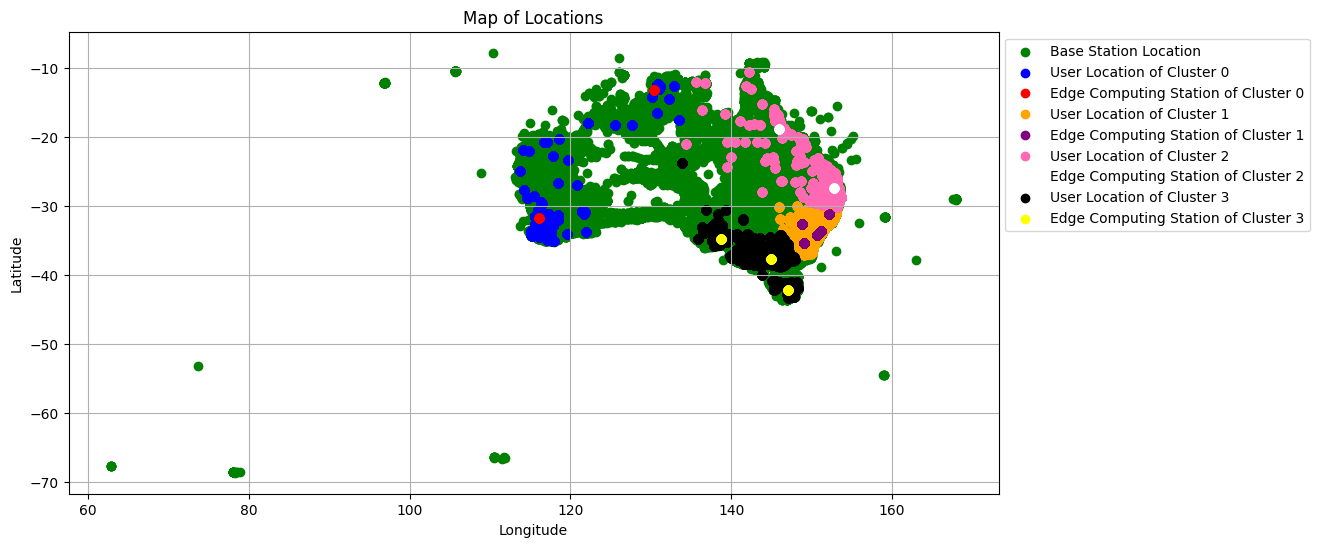

In [40]:
lons0 = clusters0_copy['Longitude']
lats0 = clusters0_copy['Latitude']
center_lon0 = clusters0_copy['center_lon']
center_lat0 = clusters0_copy['center_lat']

lons1 = clusters1_copy['Longitude']
lats1 = clusters1_copy['Latitude']
center_lon1 = clusters1_copy['center_lon']
center_lat1 = clusters1_copy['center_lat']

lons2 = clusters2_copy['Longitude']
lats2 = clusters2_copy['Latitude']
center_lon2 = clusters2_copy['center_lon']
center_lat2 = clusters2_copy['center_lat']

lons3 = clusters3_copy['Longitude']
lats3 = clusters3_copy['Latitude']
center_lon3 = clusters3_copy['center_lon']
center_lat3 = clusters3_copy['center_lat']

lats_edge = edge['LATITUDE']
lons_edge = edge['LONGITUDE']
center_lats_edge = edge['center_lat']
center_lons_edge = edge['center_lon'] 

plt.figure(figsize=(12, 6))
plt.scatter(lons_edge, lats_edge, color='green', marker='o',label='Base Station Location')
plt.scatter(lons0, lats0, color='blue', marker='o',label='User Location of Cluster 0')
plt.scatter(center_lon0, center_lat0, color='red', marker='o',label='Edge Computing Station of Cluster 0')
plt.scatter(lons1, lats1, color='orange', marker='o',label='User Location of Cluster 1')
plt.scatter(center_lon1, center_lat1, color='purple', marker='o',label='Edge Computing Station of Cluster 1')
plt.scatter(lons2, lats2, color='hotpink', marker='o',label='User Location of Cluster 2')
plt.scatter(center_lon2, center_lat2, color='white', marker='o',label='Edge Computing Station of Cluster 2')
plt.scatter(lons3, lats3, color='black', marker='o',label='User Location of Cluster 3')
plt.scatter(center_lon3, center_lat3, color='yellow', marker='o',label='Edge Computing Station of Cluster 3')
# plt.scatter(center_lons_edge, center_lats_edge, color='yellow', marker='o',label='Edge Computing Station of BSL')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Locations')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Workload

In [41]:
def size_data_cluster(data):
    test = data.copy()
    test[['new_center_lon','new_center_lat','month','date','Size']].groupby(by=['new_center_lon','new_center_lat','month']).sum().reset_index()
    return test

## Cluster 0

In [42]:
size_data_0_1_clusters0 = size_data_cluster(filtered_data_0_1_clusters0)
size_data_1_2_clusters0 = size_data_cluster(filtered_data_1_2_clusters0)
size_data_2_3_clusters0 = size_data_cluster(filtered_data_2_3_clusters0)
size_data_3_4_clusters0 = size_data_cluster(filtered_data_3_4_clusters0)
size_data_4_5_clusters0 = size_data_cluster(filtered_data_4_5_clusters0)
size_data_5_6_clusters0 = size_data_cluster(filtered_data_5_6_clusters0)
size_data_6_7_clusters0 = size_data_cluster(filtered_data_6_7_clusters0)
size_data_7_8_clusters0 = size_data_cluster(filtered_data_7_8_clusters0)
size_data_8_9_clusters0 = size_data_cluster(filtered_data_8_9_clusters0)
size_data_9_10_clusters0 = size_data_cluster(filtered_data_9_10_clusters0)
size_data_10_11_clusters0 = size_data_cluster(filtered_data_10_11_clusters0)
size_data_11_12_clusters0 = size_data_cluster(filtered_data_11_12_clusters0)
size_data_12_13_clusters0 = size_data_cluster(filtered_data_12_13_clusters0)
size_data_13_14_clusters0 = size_data_cluster(filtered_data_13_14_clusters0)
size_data_14_15_clusters0 = size_data_cluster(filtered_data_14_15_clusters0)
size_data_15_16_clusters0 = size_data_cluster(filtered_data_15_16_clusters0)
size_data_16_17_clusters0 = size_data_cluster(filtered_data_16_17_clusters0)
size_data_17_18_clusters0 = size_data_cluster(filtered_data_17_18_clusters0)
size_data_18_19_clusters0 = size_data_cluster(filtered_data_18_19_clusters0)
size_data_19_20_clusters0 = size_data_cluster(filtered_data_19_20_clusters0)
size_data_20_21_clusters0 = size_data_cluster(filtered_data_20_21_clusters0)
size_data_21_22_clusters0 = size_data_cluster(filtered_data_21_22_clusters0)
size_data_22_23_clusters0 = size_data_cluster(filtered_data_22_23_clusters0)
size_data_23_24_clusters0 = size_data_cluster(filtered_data_23_24_clusters0)

## Cluster 1

In [43]:
size_data_0_1_clusters1 = size_data_cluster(filtered_data_0_1_clusters1)
size_data_1_2_clusters1 = size_data_cluster(filtered_data_1_2_clusters1)
size_data_2_3_clusters1 = size_data_cluster(filtered_data_2_3_clusters1)
size_data_3_4_clusters1 = size_data_cluster(filtered_data_3_4_clusters1)
size_data_4_5_clusters1 = size_data_cluster(filtered_data_4_5_clusters1)
size_data_5_6_clusters1 = size_data_cluster(filtered_data_5_6_clusters1)
size_data_6_7_clusters1 = size_data_cluster(filtered_data_6_7_clusters1)
size_data_7_8_clusters1 = size_data_cluster(filtered_data_7_8_clusters1)
size_data_8_9_clusters1 = size_data_cluster(filtered_data_8_9_clusters1)
size_data_9_10_clusters1 = size_data_cluster(filtered_data_9_10_clusters1)
size_data_10_11_clusters1 = size_data_cluster(filtered_data_10_11_clusters1)
size_data_11_12_clusters1 = size_data_cluster(filtered_data_11_12_clusters1)
size_data_12_13_clusters1 = size_data_cluster(filtered_data_12_13_clusters1)
size_data_13_14_clusters1 = size_data_cluster(filtered_data_13_14_clusters1)
size_data_14_15_clusters1 = size_data_cluster(filtered_data_14_15_clusters1)
size_data_15_16_clusters1 = size_data_cluster(filtered_data_15_16_clusters1)
size_data_16_17_clusters1 = size_data_cluster(filtered_data_16_17_clusters1)
size_data_17_18_clusters1 = size_data_cluster(filtered_data_17_18_clusters1)
size_data_18_19_clusters1 = size_data_cluster(filtered_data_18_19_clusters1)
size_data_19_20_clusters1 = size_data_cluster(filtered_data_19_20_clusters1)
size_data_20_21_clusters1 = size_data_cluster(filtered_data_20_21_clusters1)
size_data_21_22_clusters1 = size_data_cluster(filtered_data_21_22_clusters1)
size_data_22_23_clusters1 = size_data_cluster(filtered_data_22_23_clusters1)
size_data_23_24_clusters1 = size_data_cluster(filtered_data_23_24_clusters1)

## Cluster 2

In [44]:
size_data_0_1_clusters2 = size_data_cluster(filtered_data_0_1_clusters2)
size_data_1_2_clusters2 = size_data_cluster(filtered_data_1_2_clusters2)
size_data_2_3_clusters2 = size_data_cluster(filtered_data_2_3_clusters2)
size_data_3_4_clusters2 = size_data_cluster(filtered_data_3_4_clusters2)
size_data_4_5_clusters2 = size_data_cluster(filtered_data_4_5_clusters2)
size_data_5_6_clusters2 = size_data_cluster(filtered_data_5_6_clusters2)
size_data_6_7_clusters2 = size_data_cluster(filtered_data_6_7_clusters2)
size_data_7_8_clusters2 = size_data_cluster(filtered_data_7_8_clusters2)
size_data_8_9_clusters2 = size_data_cluster(filtered_data_8_9_clusters2)
size_data_9_10_clusters2 = size_data_cluster(filtered_data_9_10_clusters2)
size_data_10_11_clusters2 = size_data_cluster(filtered_data_10_11_clusters2)
size_data_11_12_clusters2 = size_data_cluster(filtered_data_11_12_clusters2)
size_data_12_13_clusters2 = size_data_cluster(filtered_data_12_13_clusters2)
size_data_13_14_clusters2 = size_data_cluster(filtered_data_13_14_clusters2)
size_data_14_15_clusters2 = size_data_cluster(filtered_data_14_15_clusters2)
size_data_15_16_clusters2 = size_data_cluster(filtered_data_15_16_clusters2)
size_data_16_17_clusters2 = size_data_cluster(filtered_data_16_17_clusters2)
size_data_17_18_clusters2 = size_data_cluster(filtered_data_17_18_clusters2)
size_data_18_19_clusters2 = size_data_cluster(filtered_data_18_19_clusters2)
size_data_19_20_clusters2 = size_data_cluster(filtered_data_19_20_clusters2)
size_data_20_21_clusters2 = size_data_cluster(filtered_data_20_21_clusters2)
size_data_21_22_clusters2 = size_data_cluster(filtered_data_21_22_clusters2)
size_data_22_23_clusters2 = size_data_cluster(filtered_data_22_23_clusters2)
size_data_23_24_clusters2 = size_data_cluster(filtered_data_23_24_clusters2)

## Cluster 3

In [45]:
size_data_0_1_clusters3 = size_data_cluster(filtered_data_0_1_clusters3)
size_data_1_2_clusters3 = size_data_cluster(filtered_data_1_2_clusters3)
size_data_2_3_clusters3 = size_data_cluster(filtered_data_2_3_clusters3)
size_data_3_4_clusters3 = size_data_cluster(filtered_data_3_4_clusters3)
size_data_4_5_clusters3 = size_data_cluster(filtered_data_4_5_clusters3)
size_data_5_6_clusters3 = size_data_cluster(filtered_data_5_6_clusters3)
size_data_6_7_clusters3 = size_data_cluster(filtered_data_6_7_clusters3)
size_data_7_8_clusters3 = size_data_cluster(filtered_data_7_8_clusters3)
size_data_8_9_clusters3 = size_data_cluster(filtered_data_8_9_clusters3)
size_data_9_10_clusters3 = size_data_cluster(filtered_data_9_10_clusters3)
size_data_10_11_clusters3 = size_data_cluster(filtered_data_10_11_clusters3)
size_data_11_12_clusters3 = size_data_cluster(filtered_data_11_12_clusters3)
size_data_12_13_clusters3 = size_data_cluster(filtered_data_12_13_clusters3)
size_data_13_14_clusters3 = size_data_cluster(filtered_data_13_14_clusters3)
size_data_14_15_clusters3 = size_data_cluster(filtered_data_14_15_clusters3)
size_data_15_16_clusters3 = size_data_cluster(filtered_data_15_16_clusters3)
size_data_16_17_clusters3 = size_data_cluster(filtered_data_16_17_clusters3)
size_data_17_18_clusters3 = size_data_cluster(filtered_data_17_18_clusters3)
size_data_18_19_clusters3 = size_data_cluster(filtered_data_18_19_clusters3)
size_data_19_20_clusters3 = size_data_cluster(filtered_data_19_20_clusters3)
size_data_20_21_clusters3 = size_data_cluster(filtered_data_20_21_clusters3)
size_data_21_22_clusters3 = size_data_cluster(filtered_data_21_22_clusters3)
size_data_22_23_clusters3 = size_data_cluster(filtered_data_22_23_clusters3)
size_data_23_24_clusters3 = size_data_cluster(filtered_data_23_24_clusters3)

## By month date size

In [46]:
def by_month_date_size(data,month=None,day=None):
    by_month_size = data[['new_center_lon','new_center_lat','month','date','Size']].groupby(by=['new_center_lon','new_center_lat','month']).sum().reset_index()
    if day is None:
        by_month_size = by_month_size[(by_month_size['month']==201400 + month)]
    elif month is None:
        by_month_size = by_month_size[(by_month_size['date']== day)]
    else:
        by_month_size = by_month_size[(by_month_size['month'] == 201400 + month) & (by_month_size['date'] == day)]
    return by_month_size

In [47]:
test = by_month_date_size(data=size_data_22_23_clusters1,month=9)

In [48]:
test['Size'].mean()

7180.0

## Balance Workload 

In [49]:
def balance_workload_1(data):
    data_copy = data.copy()
    x = 0
    for i in range(len(data_copy['Size'])):
        if data_copy['Size'].iloc[i] > data_copy['Size'].mean():
            x = data_copy['Size'].iloc[i] - data_copy['Size'].mean()
            data_copy['Size'].iloc[i] = data_copy['Size'].mean()
        elif x != 0 and data_copy['Size'].iloc[i] < data_copy['Size'].mean():
            data_copy['Size'].iloc[i] += x
            x = 0
    return data_copy,data['Size'].mean(),data['Size'].sum()

def balance_workload_2_1(data,mean):
    data_copy = data.copy()
    x = 0
    for i in range(len(data_copy['Size'])):
        if data_copy['Size'].iloc[i] > mean:
            x = data_copy['Size'].iloc[i] - mean
            data_copy['Size'].iloc[i] = mean
        elif x != 0 and data_copy['Size'].iloc[i] < mean:
            data_copy['Size'].iloc[i] += x
            x = 0
    return data_copy

def balance_workload_final_1(data):
    mean = data['Size'].mean()
    a,mean,sum = balance_workload_1(test)
    while not (a[a['Size'] > mean].empty):
        a = balance_workload_2_1(a,mean)
    # a['Size'] = a['Size'].astype('int64')
    x = sum - a['Size'].sum()
    for i in range(len(a['Size'])):
        if x == 0:
            break
        elif a['Size'].iloc[i] < mean:
            tmp = mean-a['Size'].iloc[i]
            a['Size'].iloc[i] += tmp
            x -= tmp
    return a

In [50]:
def balance_workload(data,mean):
    data_copy = data.copy()
    x = 0
    for i in range(len(data_copy['Size'])):
        if data_copy['Size'].iloc[i] > mean:
            x = data_copy['Size'].iloc[i] - mean
            data_copy['Size'].iloc[i] = mean
        elif x != 0 and data_copy['Size'].iloc[i] < mean:
            data_copy['Size'].iloc[i] += x
            x = 0
    sum = data['Size'].sum()
    return data_copy,mean,sum

def balance_workload_2(data,mean):
    data_copy = data.copy()
    x = 0
    for i in range(len(data_copy['Size'])):
        if data_copy['Size'].iloc[i] > mean:
            x = data_copy['Size'].iloc[i] - mean
            data_copy['Size'].iloc[i] = mean
        elif x != 0 and data_copy['Size'].iloc[i] < mean:
            data_copy['Size'].iloc[i] += x
            x = 0
    sum = data['Size'].sum()
    return data_copy,sum

def new_mean(data,mean):
    data_copy = data.copy()
    if data_copy['Size'].mean() > mean:
        new_mean = data_copy['Size'].mean()
    else:
        new_mean = mean
    print(new_mean)
    return new_mean

def balance_workload_final(data):
    a,mean,sum = balance_workload(data,5000)
    while not (a[a['Size'] > mean].empty):
        a,sum = balance_workload_2(a,mean)
    if data['Size'].mean() > mean:
        new_mean = data['Size'].mean()
    else:
        new_mean = mean
    # a['Size'] = a['Size'].astype('int64')
    x = sum - a['Size'].sum()
    for i in range(len(a['Size'])):
        if x == 0:
            break
        elif a['Size'].iloc[i] < mean:
            tmp = mean-a['Size'].iloc[i]
            a['Size'].iloc[i] += tmp
            x -= tmp
    return a,new_mean

In [51]:
balance,new_mean = balance_workload_final(test)
balance_1 = balance_workload_final_1(test)

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_19796\778700537.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_copy['Size'].iloc[i] = mean
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_19796\778700537.py:7: SettingWithCopyWarning: 
A val

In [52]:
test

,new_center_lon,new_center_lat,month,date,Size
3,148.802447,-32.556491,201409,2104,7618
9,149.049353,-35.373240,201409,2144,7310
15,150.662563,-34.221765,201409,1907,6798
21,151.199232,-33.683831,201409,1760,6596
27,152.145285,-31.209991,201409,2274,7578


In [53]:
balance

,new_center_lon,new_center_lat,month,date,Size
3,148.802447,-32.556491,201409,2104,5000
9,149.049353,-35.373240,201409,2144,5000
15,150.662563,-34.221765,201409,1907,5000
21,151.199232,-33.683831,201409,1760,5000
27,152.145285,-31.209991,201409,2274,5000


In [54]:
balance_1

,new_center_lon,new_center_lat,month,date,Size
3,148.802447,-32.556491,201409,2104,7180.0
9,149.049353,-35.373240,201409,2144,7180.0
15,150.662563,-34.221765,201409,1907,7180.0
21,151.199232,-33.683831,201409,1760,7180.0
27,152.145285,-31.209991,201409,2274,7180.0


In [55]:
new_mean

7180.0

In [56]:
a = clusters0_copy[['new_center_lat','new_center_lon','Size']].groupby(['new_center_lat','new_center_lon']).sum().reset_index()

In [57]:
b = clusters1_copy[['new_center_lat','new_center_lon','Size']].groupby(['new_center_lat','new_center_lon']).sum().reset_index()

In [58]:
c = clusters2_copy[['new_center_lat','new_center_lon','Size']].groupby(['new_center_lat','new_center_lon']).sum().reset_index()

In [59]:
d = clusters3_copy[['new_center_lat','new_center_lon','Size']].groupby(['new_center_lat','new_center_lon']).sum().reset_index()

In [74]:
a

,new_center_lat,new_center_lon,Size
0,-31.779295,116.083531,901533
1,-13.160197,130.389247,899421


In [60]:
data = pd.concat((a,b,c,d),axis=0,ignore_index=True)

In [61]:
import pandas as pd
data = pd.read_csv('edge_placement.csv')

In [62]:
data

,new_center_lat,new_center_lon,Size
0,-31.779295,116.083531,897104
1,-13.160197,130.389247,901972
2,-35.373240,149.049353,1155919
3,-34.221765,150.662563,1180417
4,-33.683831,151.199232,1177417
5,-32.556491,148.802447,1175888
6,-31.209991,152.145285,1181056
7,-27.346753,152.792495,1693508
8,-18.879932,145.932997,1701973
9,-42.154323,146.999258,1838834


In [63]:
data.to_csv('edge_placement.csv',index=False)

# Folium

In [72]:
import folium
from folium.plugins import MarkerCluster

mymap = folium.Map(location=[-30.0, 135.0], zoom_start=2)

datasets = [a, b, c, d]

for dataset in datasets:
    marker_cluster = MarkerCluster().add_to(mymap)

    for index, row in dataset.iterrows():
        folium.CircleMarker(
            location=[row['new_center_lat'], row['new_center_lon']],
            radius=row['Size'] / 80000, 
            color='blue',             
            fill=True,
            fill_color='blue',        
            popup=str(row['Size'])    
        ).add_to(marker_cluster)

## Show map

In [73]:
mymap